# Problem set 6.1, Number: 14. The answer can be proven by manual calculation

In [1]:
# All Modul are we need
import numpy as np
import math
from romberg import * 
from trapezoid import *
import matplotlib.pyplot as plt

**Introduction**

In [2]:
print('Equation state based on problem:')
print('(e^x*x^4)\n_________\n(e^x-1)^2')
print('\nWe can see the range of debye constants (U) from 0 to 1, in intervals 0.05 :')
debye = np.arange(0,1.05,0.05)

# Loop to print debye constants
for i in range(len(debye)):
    print(float(debye[i]))
    
# Get variable (u) as the upper limit of integral   
u = debye**-1 #Its representative by 1/U, where U is a debye constant

Equation state based on problem:
(e^x*x^4)
_________
(e^x-1)^2

We can see the range of debye constants (U) from 0 to 1, in intervals 0.05 :
0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001
1.0


C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in reciprocal
  # This is added back by InteractiveShellApp.init_path()


**With Romberg integration**

In [3]:
# Equation based on Exercise
def f(x): return (math.exp(x)*x**4)/(math.exp(x)-1)**2

print('---Using Romberg methods---')
print('\nThe integral results with:')
print('the lower limit = 0 and the upper limit = 1/U')
print('where; U has a range and intervals based on loop above')
print('Those are:')

# Loop to find and print integral results after multiplied with U^3
J = []
for j in range(1,len(debye)):
    I,n = romberg(f,10e-6,u[j])
    J.append(I)
    print("\nWhen, debye constant(U) =",debye[j],'\nThe integral results','\nafter multiplied U^3 =',I*(debye[j])**3)
    print("numEvals =",n)
    
# Loop to draw a plot based on the integral results
debye1 = np.delete(debye,[0]) 
integral1 = np.zeros(len(J))
for k in range(len(J)):
    integral1[k] = J[k]*debye1[k]**3 

---Using Romberg methods---

The integral results with:
the lower limit = 0 and the upper limit = 1/U
where; U has a range and intervals based on loop above
Those are:

When, debye constant(U) = 0.05 
The integral results 
after multiplied U^3 = 0.0032469188668128447
numEvals = 128

When, debye constant(U) = 0.1 
The integral results 
after multiplied U^3 = 0.0252736676761275
numEvals = 64

When, debye constant(U) = 0.15000000000000002 
The integral results 
after multiplied U^3 = 0.07099747513916903
numEvals = 64

When, debye constant(U) = 0.2 
The integral results 
after multiplied U^3 = 0.12287827452315887
numEvals = 32

When, debye constant(U) = 0.25 
The integral results 
after multiplied U^3 = 0.1676864436485825
numEvals = 32

When, debye constant(U) = 0.30000000000000004 
The integral results 
after multiplied U^3 = 0.20256759814619554
numEvals = 32

When, debye constant(U) = 0.35000000000000003 
The integral results 
after multiplied U^3 = 0.22885758196388814
numEvals = 32

Whe

**With Trapezoid integration**

In [4]:
# Equation based on Exercise
def f(x): return (math.exp(x)*x**4)/(math.exp(x)-1)**2
Iold = 0.0

print('---Using Trapezoid methods---')
print('\nThe integral results with:')
print('the lower limit = 0 and the upper limit = 1/U')
print('where; U has a range and intervals based on loop above')
print('Those are:')

# Loop to find and print integral results after multiplied with U^3
J = []
for i in range (1,len(u)):
    for k in range (1,21):
        Inew = trapezoid(f,10e-6,u[i],Iold,k)
        if (i > 1) and (abs(Inew - Iold)) < 1.0e-6: break
        Iold = Inew
    J.append(Inew)
    print("\nWhen, debye constant(U) =",debye[i],'\nThe integral results','\nafter multiplied U^3 =',Inew*(debye[i])**3)
    print("nPanels =",2**(i-1)) 
    
# Loop to draw a plot based on the integral results
debye2 = np.delete(debye,[0]) 
integral2 = np.zeros(len(J)) 
for j in range (len(J)):
    integral2[j] = debye2[j]**3 * J[j]

---Using Trapezoid methods---

The integral results with:
the lower limit = 0 and the upper limit = 1/U
where; U has a range and intervals based on loop above
Those are:

When, debye constant(U) = 0.05 
The integral results 
after multiplied U^3 = 0.003246918866903863
nPanels = 1

When, debye constant(U) = 0.1 
The integral results 
after multiplied U^3 = 0.025273667541685432
nPanels = 2

When, debye constant(U) = 0.15000000000000002 
The integral results 
after multiplied U^3 = 0.07099747438276222
nPanels = 4

When, debye constant(U) = 0.2 
The integral results 
after multiplied U^3 = 0.12287827362942602
nPanels = 8

When, debye constant(U) = 0.25 
The integral results 
after multiplied U^3 = 0.16768644003312883
nPanels = 16

When, debye constant(U) = 0.30000000000000004 
The integral results 
after multiplied U^3 = 0.20256760170039245
nPanels = 32

When, debye constant(U) = 0.35000000000000003 
The integral results 
after multiplied U^3 = 0.22885759029478814
nPanels = 64

When, debye

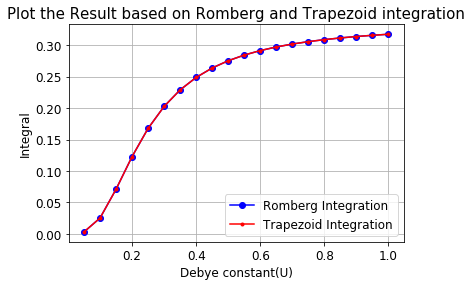

In [5]:
# Plot the result
plt.plot(debye1,integral1,'ob-') #Plot for Romberg integration
plt.plot(debye2,integral2,'.-r') #Plot for Trapezoid integration
plt.title('Plot the Result based on Romberg and Trapezoid integration',size=15)
plt.xlabel('Debye constant(U)',size=12)
plt.ylabel('Integral',size=12)
plt.legend(['Romberg Integration','Trapezoid Integration'], prop={'size': 12})
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid()
plt.show()